In [1]:
import requests

base_adress = "https://api.spotify.com"
client_secret = "0ffcb78d32ea42d5bb37456f919f4809"
client_id = "0b3bd3d84e824a68a53325cb16e8eb57"



In [3]:
def get_acces_token(client_id, client_secret):
    """retourne un json (dict)"""
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {
        "grant_type": "client_credentials",
        "client_id": f"{client_id}",
        f"client_secret": f"{client_secret}"
    }

    response = requests.post(url, headers=headers, data=data)

    return response.json()

def get_single_track(accessToken, song_id):
    song = requests.get(
        url="https://api.spotify.com/v1/tracks/" + song_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return song.json()

def get_single_track_features(accessToken, song_id):
    """get stuff like tempo, key, time signature, dancability etc. for one song"""
    song_features = requests.get(
        url="https://api.spotify.com/v1/audio-features/" + song_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return song_features.json()

def get_single_track_analysis(accessToken, song_id):
    """same as features but with more info including confidence and bar per bar analysis"""
    song_features = requests.get(
        url="https://api.spotify.com/v1/audio-analysis/" + song_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return song_features.json()

def get_several_tracks_features(accessToken, songs_id : list) -> list:
    """maximum 100 ids"""
    if (len(songs_id) > 100):
        raise ValueError("Too Many Songs")
    songs_id_string = ",".join(songs_id)
    songs_features = requests.get(
        url="https://api.spotify.com/v1/audio-features?ids=" + songs_id_string,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return songs_features.json()

def get_playlist(accessToken, playlist_id):
    playlist = requests.get(
        url="https://api.spotify.com/v1/playlists/" + playlist_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return playlist.json()

import requests
import pandas as pd

base_adress = "https://api.spotify.com"
client_secret = "0ffcb78d32ea42d5bb37456f919f4809"
client_id = "0b3bd3d84e824a68a53325cb16e8eb57"
def get_acces_token(client_id, client_secret):
    """retourne un json (dict)"""
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {
        "grant_type": "client_credentials",
        "client_id": f"{client_id}",
        f"client_secret": f"{client_secret}"
    }

    response = requests.post(url, headers=headers, data=data)

    return response.json()

def get_single_track(accessToken, song_id):
    song = requests.get(
        url="https://api.spotify.com/v1/tracks/" + song_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return song.json()

def get_single_track_features(accessToken, song_id):
    """get stuff like tempo, key, time signature, dancability etc. for one song"""
    song_features = requests.get(
        url="https://api.spotify.com/v1/audio-features/" + song_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return song_features.json()

def get_single_track_analysis(accessToken, song_id):
    """same as features but with more info including confidence and bar per bar analysis"""
    song_features = requests.get(
        url="https://api.spotify.com/v1/audio-analysis/" + song_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return song_features.json()

def get_several_tracks_features(accessToken, songs_id : list) -> list:
    """maximum 100 ids"""
    if (len(songs_id) > 100):
        raise ValueError("Too Many Songs")
    songs_id_string = ",".join(songs_id)
    songs_features = requests.get(
        url="https://api.spotify.com/v1/audio-features?ids=" + songs_id_string,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return songs_features.json()

def get_playlist(accessToken, playlist_id):
    playlist = requests.get(
        url="https://api.spotify.com/v1/playlists/" + playlist_id,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    return playlist.json()

def get_playlist_tracks_features(accessToken, playlist):
    """params: spotify playlist json object, returns a pandas dataframe"""
    songs_id = []
    songs_titles = []
    songs_artists = []
    for track in playlist["tracks"]["items"]:
        info = track["track"]
        songs_titles.append(info["name"])
        songs_artists.append([artist["name"] for artist in info["artists"]])
        songs_id.append(info["id"])
    songs_features_raw = get_several_tracks_features(accessToken, songs_id)
    songs_features = songs_features_raw["audio_features"]
    #danceabilities = [song["danceability"] for song in songs_features]

    if len(songs_features) != len(songs_id):
        raise RuntimeError("Not all songs have been succesfully analysed, aborted")

    else :
        temp = pd.DataFrame({"title" : songs_titles, "artists": songs_artists})
        songs_df = pd.DataFrame(songs_features)
        songs_df = pd.concat([temp, songs_df], axis = 1)

        return songs_df


In [19]:
accessToken = get_acces_token(client_id, client_secret)["access_token"]

In [5]:
playlist = get_playlist(accessToken, "37i9dQZEVXbIPWwFssbupI")
playlist_songs_features = get_playlist_tracks_features(accessToken, playlist)

In [6]:
playlist_songs_features

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,CARTIER SANTOS,[SDM],0.489,0.586,9,-7.218,0,0.3270,0.083700,0.000000,0.1620,0.0892,89.493,audio_features,1Mzg6bu3hkCwJKEf7v49MN,spotify:track:1Mzg6bu3hkCwJKEf7v49MN,https://api.spotify.com/v1/tracks/1Mzg6bu3hkCw...,https://api.spotify.com/v1/audio-analysis/1Mzg...,183813,4
1,POUR ELLE,[SDM],0.586,0.666,11,-7.590,0,0.0714,0.120000,0.000001,0.1200,0.3660,99.889,audio_features,5jX61gvbNenSDMldQrbtsU,spotify:track:5jX61gvbNenSDMldQrbtsU,https://api.spotify.com/v1/tracks/5jX61gvbNenS...,https://api.spotify.com/v1/audio-analysis/5jX6...,179035,4
2,Ca parle mal,[Bouss],0.770,0.426,1,-8.242,1,0.5130,0.436000,0.000000,0.0994,0.2600,93.881,audio_features,7ifFhxRIvYbe4IuzIkY2Qi,spotify:track:7ifFhxRIvYbe4IuzIkY2Qi,https://api.spotify.com/v1/tracks/7ifFhxRIvYbe...,https://api.spotify.com/v1/audio-analysis/7ifF...,176248,4
3,SOIS PAS TIMIDE,[GIMS],0.917,0.658,1,-7.253,1,0.0933,0.089600,0.000010,0.0733,0.7950,127.936,audio_features,0yyFAbTlOk7DFhh6RSug9S,spotify:track:0yyFAbTlOk7DFhh6RSug9S,https://api.spotify.com/v1/tracks/0yyFAbTlOk7D...,https://api.spotify.com/v1/audio-analysis/0yyF...,165978,4
4,Monaco,[Guy2Bezbar],0.703,0.700,11,-6.185,0,0.0763,0.105000,0.000000,0.1050,0.6370,123.059,audio_features,2tT8SYE7NnNDKbBsHWPIDY,spotify:track:2tT8SYE7NnNDKbBsHWPIDY,https://api.spotify.com/v1/tracks/2tT8SYE7NnND...,https://api.spotify.com/v1/audio-analysis/2tT8...,141315,4
5,SPIDER,"[GIMS, DYSTINCT]",0.823,0.691,9,-7.322,0,0.1970,0.077400,0.000002,0.1000,0.7070,119.960,audio_features,5NWpquAje6NyvxD57oXNu6,spotify:track:5NWpquAje6NyvxD57oXNu6,https://api.spotify.com/v1/tracks/5NWpquAje6Ny...,https://api.spotify.com/v1/audio-analysis/5NWp...,188818,4
6,MANON B,"[Tiakola, Ryflo, Oskoow]",0.872,0.708,10,-7.472,1,0.1760,0.336000,0.000000,0.0998,0.3080,130.081,audio_features,6C0SXfD7rR46MpWK5VJSEw,spotify:track:6C0SXfD7rR46MpWK5VJSEw,https://api.spotify.com/v1/tracks/6C0SXfD7rR46...,https://api.spotify.com/v1/audio-analysis/6C0S...,169846,4
7,Imagine,[Carbonne],0.788,0.627,0,-9.072,0,0.0751,0.693000,0.000000,0.2320,0.9090,118.093,audio_features,6IcsbETuviVu6UTiBTcxY4,spotify:track:6IcsbETuviVu6UTiBTcxY4,https://api.spotify.com/v1/tracks/6IcsbETuviVu...,https://api.spotify.com/v1/audio-analysis/6Ics...,165894,4
8,Minimum ça,[Dr. Yaro],0.748,0.733,3,-3.688,0,0.0587,0.665000,0.000000,0.0733,0.9670,115.016,audio_features,4mNttG8qiVh4BKrMUrUhCI,spotify:track:4mNttG8qiVh4BKrMUrUhCI,https://api.spotify.com/v1/tracks/4mNttG8qiVh4...,https://api.spotify.com/v1/audio-analysis/4mNt...,149812,4
9,Pétunias,[Werenoi],0.722,0.545,11,-6.346,0,0.0343,0.429000,0.000000,0.1010,0.3740,121.048,audio_features,3Byu179ofnuChb4zF1fMhu,spotify:track:3Byu179ofnuChb4zF1fMhu,https://api.spotify.com/v1/tracks/3Byu179ofnuC...,https://api.spotify.com/v1/audio-analysis/3Byu...,210248,4


In [8]:
import matplotlib.pyplot as plt

(array([3., 0., 1., 0., 1., 1., 0., 3., 2., 2., 5., 6., 3., 9., 5., 2., 2.,
        2., 0., 3.]),
 array([0.467  , 0.48985, 0.5127 , 0.53555, 0.5584 , 0.58125, 0.6041 ,
        0.62695, 0.6498 , 0.67265, 0.6955 , 0.71835, 0.7412 , 0.76405,
        0.7869 , 0.80975, 0.8326 , 0.85545, 0.8783 , 0.90115, 0.924  ]),
 <BarContainer object of 20 artists>)

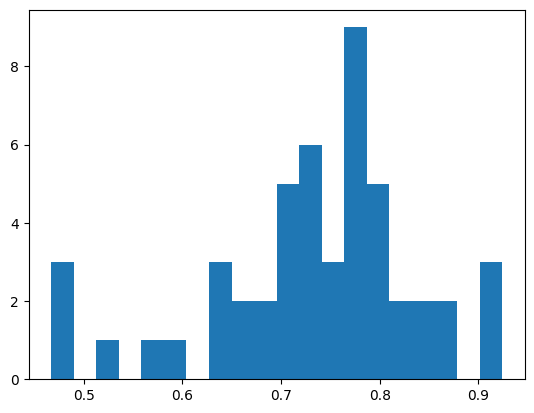

In [17]:
plt.scatter(playlist_songs_features)

In [29]:
import json
def search_for_top50_playlist(accessToken, country_name):
    # Format the country name to fit in the query
    query = f"Top 50 {country_name}"
    # Encode the query for use in the URL
    encoded_query = f"q={query.replace(' ', '%20')}&type=playlist"
    response = requests.get(
        url="https://api.spotify.com/v1/search?" + encoded_query,
        headers={
            "Authorization": 'Bearer ' + accessToken
        }
    )
    if (response.status_code != 200):
        print(f"{country_name} request failed, returned None")
        return None
    
    res_object = response.json()
    playlists = res_object["playlists"]["items"]
    
    # we take the first playlist as it is most probably the one we want
    playlist = playlists[0]
    
    # check if it is indeed a top50 playlist
    # commented checks were too specific and caused many songs to be removed incorrectly
    '''if playlist["name"] != f"Top 50 - {country_name}":   
        print(f"Condition failed: Playlist name is not 'Top 50 - {country_name}'")
        print(f"{country_name} playlist incorrect, returned None")
        print(f"Details: {json.dumps(playlist, indent=2)}")
        return None

    if playlist["owner"]["id"] != "spotify":
        print(f"Condition failed: Playlist owner is not 'spotify'")
        print(f"{country_name} playlist incorrect, returned None")
        print(f"Details: {json.dumps(playlist, indent=2)}")
        return None'''
    
    if playlist["tracks"]["total"] != 50:  
        print(f"Condition failed: Number of tracks is not 50")
        print(f"{country_name} playlist incorrect, returned None")
        print(f"Details: {json.dumps(playlist, indent=2)}")
        return None
    else:
        return playlist

In [26]:
playlist = search_for_top50_playlist(accessToken, "France")
print(json.dumps(playlist, indent=2))

{
  "collaborative": false,
  "description": "Your daily update of the most played tracks right now - France.",
  "external_urls": {
    "spotify": "https://open.spotify.com/playlist/37i9dQZEVXbIPWwFssbupI"
  },
  "href": "https://api.spotify.com/v1/playlists/37i9dQZEVXbIPWwFssbupI",
  "id": "37i9dQZEVXbIPWwFssbupI",
  "images": [
    {
      "height": null,
      "url": "https://charts-images.scdn.co/assets/locale_en/regional/daily/region_fr_large.jpg",
      "width": null
    }
  ],
  "name": "Top 50 - France",
  "owner": {
    "display_name": "Spotify",
    "external_urls": {
      "spotify": "https://open.spotify.com/user/spotify"
    },
    "href": "https://api.spotify.com/v1/users/spotify",
    "id": "spotify",
    "type": "user",
    "uri": "spotify:user:spotify"
  },
  "primary_color": null,
  "public": null,
  "snapshot_id": "NzgzMTg2MDAwLDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDY1NmU=",
  "tracks": {
    "href": "https://api.spotify.com/v1/playlists/37i9dQZEVXbIPWwFss

In [33]:
# on va construire un data frame avec l'id de tout les pays que l'on peux trouver 
# liste de tout les pays faite par chatGPT

countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", 
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", 
    "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", 
    "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", 
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo, Democratic Republic of the", 
    "Congo, Republic of the", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", 
    "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", 
    "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", 
    "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", 
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", 
    "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", 
    "Korea, North", "Korea, South", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", 
    "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", 
    "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", 
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", 
    "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", 
    "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", 
    "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", 
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", 
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", 
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", 
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", 
    "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", 
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", 
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", 
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

top50_dict = {"target_country" : [], "playlist_name" : [], "playlist_id": [], "owner_id" : [], "owner_display_name" : []}
for country in countries:
    top50_dict["target_country"].append(country)
    result = search_for_top50_playlist(accessToken, country)
    if result != None:
        top50_dict["playlist_name"].append(result["name"])
        top50_dict["playlist_id"].append(result["id"])
        top50_dict["owner_id"].append(result["owner"]["id"])
        top50_dict["owner_display_name"].append(result["owner"]["display_name"])
    else :
        top50_dict["playlist_name"].append(None)
        top50_dict["playlist_id"].append(None)
        top50_dict["owner_id"].append(None)
        top50_dict["owner_display_name"].append(None)

top50_df = pd.DataFrame(top50_dict)
        

Condition failed: Number of tracks is not 50
Albania playlist incorrect, returned None
Details: {
  "collaborative": false,
  "description": "Your daily update of the most played tracks right now - Albania",
  "external_urls": {
    "spotify": "https://open.spotify.com/playlist/7CfHr38WwpyBO2TAh3Jww6"
  },
  "href": "https://api.spotify.com/v1/playlists/7CfHr38WwpyBO2TAh3Jww6",
  "id": "7CfHr38WwpyBO2TAh3Jww6",
  "images": [
    {
      "height": null,
      "url": "https://image-cdn-ak.spotifycdn.com/image/ab67706c0000bebba0b441b2f8a590f6f5e438df",
      "width": null
    }
  ],
  "name": "Top 50 - Albania ",
  "owner": {
    "display_name": "ALBANIATON",
    "external_urls": {
      "spotify": "https://open.spotify.com/user/skizofrenikbeats"
    },
    "href": "https://api.spotify.com/v1/users/skizofrenikbeats",
    "id": "skizofrenikbeats",
    "type": "user",
    "uri": "spotify:user:skizofrenikbeats"
  },
  "primary_color": null,
  "public": null,
  "snapshot_id": "NjcyLDNiZjZkMmU

In [34]:
top50_df

,target_country,playlist_name,playlist_id,owner_id,owner_display_name
0,Afghanistan,Top 50 - Afghanistan,1m7Ov4UeE0XYD2P82Qnt8B,ccyh34kzbzuh19ptcrtle8yfn,Spotify
1,Albania,None,None,None,None
2,Algeria,Hot Hits Morocco,37i9dQZF1DWYHO8PTSQ9fM,spotify,Spotify
3,Andorra,Viral 50 - Andorra,37i9dQZEVXbMxjQJh4Um8T,spotify,Spotify
4,Angola,None,None,None,None
...,...,...,...,...,...
190,Venezuela,Top 50 - Venezuela,37i9dQZEVXbNLrliB10ZnX,spotify,Spotify
191,Vietnam,Top 50 - Vietnam,37i9dQZEVXbLdGSmz6xilI,spotify,Spotify
192,Yemen,Top 50 - Global,37i9dQZEVXbMDoHDwVN2tF,spotify,Spotify
193,Zambia,Top 50 - Zambia,7iMwO7PbOYoaalwTgWSs8Y,212v6yrvoxusnyvntujrtokra,Chileshe Kakumya


In [38]:
top50_df.isna().sum()

target_country         0
playlist_name         43
playlist_id           43
owner_id              43
owner_display_name    43
dtype: int64

On pourra noter dans le rapport que malgrer l'utilisation de l'API il y a beaucoup de variabiliter dans les données les rendant difficile à filtrer. Par exemple le userId du createur de la playlist n'est pas tout le temps "spotify", le nom peut etre Top -50 ou Viral - 50, parfois avec un tiret simple parfois double etc...

## Nettoyage de la liste des playlists
La récupération des playlistes de type Top50 n'a pas aboutie à une liste propre. En effet, les playlistes selectionnées résultent du premier résultat obtenu en recherchant "Top50 {pays}" sur Spotify. Certains des résultats ne correspondent pas à une playlist Top50 publiée par Spotify pour le pays concerné. C'est le cas, par exemple, de l'Albanie qui ne présente aucun résultat ou bien de Barbados qui est associé à celui des Etats-Unis.

Le script _clean_top50_data()_ permet alors ne conserver que les pays présentant une playlist valide.

In [3]:
import pandas as pd

# script nettoyant le fichier top50_playlists_data.csv
def clean_top50_data(fichier) :

    # ouvrir le fichier
    df = pd.read_csv(fichier)
    
    # garder uniquement les lignes où owner_id est "spotify"
    df = df[df['owner_id'] == 'spotify']
    
    # garder uniquement les lignes où target_country est contenu dans playlist_name
    df = df[df.apply(lambda row: row['target_country'] in row['playlist_name'], axis=1)]
    
    # Enregistrer le DataFrame nettoyé dans un nouveau fichier CSV
    cleaned_file = 'cleaned_top50_playlists_data.csv'
    df.to_csv(cleaned_file, index=False)
    print(f"Le fichier nettoyé a été sauvegardé sous le nom : {cleaned_file}")

# Exécuter la fonction pour nettoyer le fichier
clean_top50_data('data/top50_playlists_data.csv')




Le fichier nettoyé a été sauvegardé sous le nom : cleaned_top50_playlists_data.csv
